In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.api as sm

import seaborn as sns
sns.set(color_codes=True)

import pandas as pd
shot_df = pd.read_csv('shot_logs.csv')

pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\edwin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
shot_df.head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.800,2,1.900,7.700,2,made,"Anderson, Alan",101187,1.300,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.400,0,0.800,28.200,3,missed,"Bogdanovic, Bojan",202711,6.100,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,nan,3,2.700,10.100,2,missed,"Bogdanovic, Bojan",202711,0.900,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.300,2,1.900,17.200,2,missed,"Brown, Markel",203900,3.400,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.900,2,2.700,3.700,2,missed,"Young, Thaddeus",201152,1.100,0,0,brian roberts,203148


In [3]:
shot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

In [4]:
shot_df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,128069.000,128069.000,128069.000,128069.000,122502.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000
mean,21400451.879,0.209,6.507,2.469,12.453,2.023,2.766,13.572,2.265,159038.487,4.123,0.452,0.997,157238.251
std,257.877,13.233,4.713,1.140,5.763,3.478,3.044,8.889,0.441,78791.173,2.756,0.498,1.131,79362.389
min,21400001.000,-53.000,1.000,1.000,0.000,0.000,-163.600,0.000,2.000,708.000,0.000,0.000,0.000,708.000
25%,21400233.000,-8.000,3.000,1.000,8.200,0.000,0.900,4.700,2.000,101249.000,2.300,0.000,0.000,101162.000
50%,21400449.000,1.000,5.000,2.000,12.300,1.000,1.600,13.700,2.000,201949.000,3.700,0.000,0.000,201939.000
75%,21400673.000,9.000,9.000,3.000,16.675,2.000,3.700,22.500,3.000,203079.000,5.300,1.000,2.000,202704.000
max,21400908.000,53.000,38.000,7.000,24.000,32.000,24.900,47.200,3.000,530027.000,53.200,1.000,3.000,204060.000


In [5]:
print (len (shot_df[shot_df['TOUCH_TIME']<0]))
print (round(len (shot_df[shot_df['TOUCH_TIME']<0])/float(len (shot_df)),3)*100,'%')

312
0.2 %


In [6]:
import datetime as dt
a=shot_df['GAME_CLOCK'].apply(lambda x: dt.datetime.strptime(x,"%M:%S"))
a.describe()

count                  128069
unique                    719
top       1900-01-01 00:00:01
freq                      859
first     1900-01-01 00:00:00
last      1900-01-01 00:12:00
Name: GAME_CLOCK, dtype: object

In [7]:
shot_df['SECOND'] = a.dt.second * 1.0

In [8]:
shot_df['MINUTE'] = a.dt.minute * 1.0

In [9]:
shot_df.loc[shot_df['SHOT_CLOCK'].isnull() & (shot_df['SECOND'] <= 24) & (shot_df['MINUTE'] == 0), 'SHOT_CLOCK'] = shot_df['SECOND']
shot_df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id,SECOND,MINUTE
count,128069.000,128069.000,128069.000,128069.000,126056.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000
mean,21400451.879,0.209,6.507,2.469,12.222,2.023,2.766,13.572,2.265,159038.487,4.123,0.452,0.997,157238.251,28.942,5.374
std,257.877,13.233,4.713,1.140,5.901,3.478,3.044,8.889,0.441,78791.173,2.756,0.498,1.131,79362.389,17.405,3.446
min,21400001.000,-53.000,1.000,1.000,0.000,0.000,-163.600,0.000,2.000,708.000,0.000,0.000,0.000,708.000,0.000,0.000
25%,21400233.000,-8.000,3.000,1.000,7.900,0.000,0.900,4.700,2.000,101249.000,2.300,0.000,0.000,101162.000,14.000,2.000
50%,21400449.000,1.000,5.000,2.000,12.100,1.000,1.600,13.700,2.000,201949.000,3.700,0.000,0.000,201939.000,29.000,5.000
75%,21400673.000,9.000,9.000,3.000,16.500,2.000,3.700,22.500,3.000,203079.000,5.300,1.000,2.000,202704.000,44.000,8.000
max,21400908.000,53.000,38.000,7.000,24.000,32.000,24.900,47.200,3.000,530027.000,53.200,1.000,3.000,204060.000,59.000,12.000


In [10]:
shot_df['SHOT_CLOCK'] = shot_df['SHOT_CLOCK'].fillna(0)
shot_df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id,SECOND,MINUTE
count,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000,128069.000
mean,21400451.879,0.209,6.507,2.469,12.030,2.023,2.766,13.572,2.265,159038.487,4.123,0.452,0.997,157238.251,28.942,5.374
std,257.877,13.233,4.713,1.140,6.049,3.478,3.044,8.889,0.441,78791.173,2.756,0.498,1.131,79362.389,17.405,3.446
min,21400001.000,-53.000,1.000,1.000,0.000,0.000,-163.600,0.000,2.000,708.000,0.000,0.000,0.000,708.000,0.000,0.000
25%,21400233.000,-8.000,3.000,1.000,7.600,0.000,0.900,4.700,2.000,101249.000,2.300,0.000,0.000,101162.000,14.000,2.000
50%,21400449.000,1.000,5.000,2.000,12.000,1.000,1.600,13.700,2.000,201949.000,3.700,0.000,0.000,201939.000,29.000,5.000
75%,21400673.000,9.000,9.000,3.000,16.400,2.000,3.700,22.500,3.000,203079.000,5.300,1.000,2.000,202704.000,44.000,8.000
max,21400908.000,53.000,38.000,7.000,24.000,32.000,24.900,47.200,3.000,530027.000,53.200,1.000,3.000,204060.000,59.000,12.000


In [11]:
shot_df = shot_df[(shot_df['TOUCH_TIME'] >= 0)]

In [12]:
shot_df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id,SECOND,MINUTE
count,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000,127757.000
mean,21400451.911,0.210,6.506,2.470,12.027,2.028,2.779,13.577,2.265,159043.963,4.124,0.452,0.998,157229.090,28.941,5.374
std,257.896,13.235,4.714,1.140,6.042,3.481,2.987,8.888,0.441,78788.073,2.756,0.498,1.131,79369.283,17.405,3.446
min,21400001.000,-53.000,1.000,1.000,0.000,0.000,0.000,0.000,2.000,708.000,0.000,0.000,0.000,708.000,0.000,0.000
25%,21400233.000,-8.000,3.000,1.000,7.600,0.000,0.900,4.700,2.000,101249.000,2.300,0.000,0.000,101162.000,14.000,2.000
50%,21400449.000,1.000,5.000,2.000,12.000,1.000,1.600,13.700,2.000,201949.000,3.700,0.000,0.000,201939.000,29.000,5.000
75%,21400673.000,9.000,9.000,3.000,16.400,2.000,3.700,22.500,3.000,203079.000,5.300,1.000,2.000,202704.000,44.000,8.000
max,21400908.000,53.000,38.000,7.000,24.000,32.000,24.900,47.200,3.000,530027.000,53.200,1.000,3.000,204060.000,59.000,12.000


In [13]:
# defenders
defender_df = pd.concat([shot_df['CLOSEST_DEFENDER_PLAYER_ID'], shot_df['CLOSEST_DEFENDER']], axis=1, keys=['PLAYER_ID', 'PLAYER'])
defender_df = defender_df.drop_duplicates()
defender_df.reset_index().head(10)

,index,PLAYER_ID,PLAYER
0,0,101187,"Anderson, Alan"
1,1,202711,"Bogdanovic, Bojan"
2,3,203900,"Brown, Markel"
3,4,201152,"Young, Thaddeus"
4,5,101114,"Williams, Deron"
5,6,101127,"Jack, Jarrett"
6,7,203486,"Plumlee, Mason"
7,8,202721,"Morris, Darius"
8,9,201961,"Ellington, Wayne"
9,10,202391,"Lin, Jeremy"


In [14]:
# shooters
shooter_df = pd.concat([shot_df['player_id'], shot_df['player_name']], axis=1, keys=['PLAYER_ID', 'PLAYER'])
shooter_df = shooter_df.drop_duplicates()
shooter_df.reset_index().head(10)

,index,PLAYER_ID,PLAYER
0,0,203148,brian roberts
1,372,202687,bismack biyombo
2,486,2744,al jefferson
3,1286,203469,cody zeller
4,1641,202390,gary neal
5,2100,201945,gerald henderson
6,2663,202689,kemba walker
7,3358,203077,michael kidd-gilchrist
8,3727,202362,lance stephenson
9,4163,101107,marvin williams


In [15]:
# FG%
for index, row in shooter_df.iterrows():
    this_id = row['PLAYER_ID']
    
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'FGM']\
        = shot_df[(shot_df['SHOT_RESULT'] == 'made') 
            & (shot_df['player_id'] == this_id)]['player_id'].count()
    
    shooter_df.loc[ (shooter_df['PLAYER_ID'] == this_id), 'FGA']\
        = shot_df[(shot_df['player_id'] == this_id)]['player_id'].count()
    
    shooter_df['FG%'] = shooter_df['FGM'] / shooter_df['FGA']
    
# 2PFG%

    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), '2PFGM']\
        = shot_df[(shot_df['SHOT_RESULT'] == 'made') 
            & (shot_df['PTS'] == 2) & (shot_df['player_id'] == this_id)]['player_id'].count()
    
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), '2PFGA']\
        = shot_df[(shot_df['PTS_TYPE'] == 2) & (shot_df['player_id'] == this_id) ]['player_id'].count()
    
    shooter_df['2PFG%'] = shooter_df['2PFGM'] / shooter_df['2PFGA']

# 3PFG%

    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), '3PFGM']\
        = shot_df[(shot_df['SHOT_RESULT'] == 'made') 
            & (shot_df['PTS'] == 3) & (shot_df['player_id'] == this_id)]['player_id'].count()
    
    shooter_df.loc[ (shooter_df['PLAYER_ID'] == this_id), '3PFGA']\
        = shot_df[(shot_df['PTS_TYPE'] == 3) & (shot_df['player_id'] == this_id) ]['player_id'].count()
    
    shooter_df['3PFG%'] = shooter_df['3PFGM'] / shooter_df['3PFGA']
    
# 2P% Per Shot
    
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), '2P%']\
        = shooter_df['2PFGA'] / (shooter_df['2PFGA'] + shooter_df['3PFGA'])
         
# Points Per Shot
    
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'POINTS']\
        = shot_df[(shot_df['PTS'] >= 2) 
            & (shot_df['player_id'] == this_id)]['PTS'].sum()
        
    shooter_df['PPS'] = shooter_df['POINTS'] / shooter_df['FGA']

# Distance Per FGM (DPFGM)

    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'FGM_DIST']\
        = shot_df[(shot_df['SHOT_RESULT'] == 'made') 
            & (shot_df['player_id'] == this_id)]['SHOT_DIST'].sum()
    
    shooter_df['DPFGM'] = shooter_df['FGM_DIST'] / shooter_df['FGM']
    
# Distance Per FGA (DPFGA)

    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'FGA_DIST']\
        = shot_df[(shot_df['player_id'] == this_id)]['SHOT_DIST'].sum()
    
    shooter_df['DPFGA'] = shooter_df['FGA_DIST'] / shooter_df['FGA']

# Fill NaN as 0 in 3PFG%
    
    shooter_df['3PFG%'] = shooter_df['3PFG%'].fillna(0)

# Total game played with at least one FGA

    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'TOTAL_GAME']\
        = shot_df[(shot_df['player_id'] == this_id)]['GAME_ID'].nunique()

# FGM per game
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'FGM_PER_GAME']\
        = shooter_df['FGM'] / shooter_df['TOTAL_GAME']

# FGA per game
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'FGA_PER_GAME']\
        = shooter_df['FGA'] / shooter_df['TOTAL_GAME']
        
# Points per game
    shooter_df.loc[(shooter_df['PLAYER_ID'] == this_id), 'PPG']\
        = shooter_df['POINTS'] / shooter_df['TOTAL_GAME']

In [16]:
shooter_df[(shooter_df['PLAYER'] == "stephen curry") | (shooter_df['PLAYER'] =="lebron james")]

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
14054,201939,stephen curry,470.000,968.000,0.486,280.000,512.000,0.547,190.000,456.000,0.417,0.529,1130.000,1.167,7277.300,15.484,16911.400,17.470,58.000,8.103,16.690,19.483
45834,2544,lebron james,477.000,977.000,0.488,392.000,725.000,0.541,85.000,252.000,0.337,0.742,1039.000,1.063,5384.400,11.288,13688.800,14.011,51.000,9.353,19.157,20.373


In [17]:
shooter_df.describe()

,PLAYER_ID,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
count,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000,281.000
mean,156441.591,205.715,454.651,0.452,163.367,334.185,0.485,42.349,120.466,0.288,0.727,453.779,0.999,2405.752,11.852,6172.713,13.416,51.043,3.932,8.713,8.673
std,80242.782,107.272,229.441,0.060,99.559,197.973,0.055,39.964,106.463,0.149,0.213,232.404,0.098,1486.643,4.417,3728.964,4.504,8.263,1.874,4.037,4.011
min,708.000,29.000,47.000,0.309,4.000,14.000,0.286,0.000,0.000,0.000,0.149,58.000,0.694,76.400,2.176,125.500,2.610,27.000,0.906,1.741,2.148
25%,101162.000,120.000,266.000,0.413,86.000,179.000,0.456,5.000,16.000,0.250,0.562,265.000,0.941,1198.800,8.669,3072.500,10.063,45.000,2.517,5.460,5.646
50%,201952.000,190.000,418.000,0.446,149.000,304.000,0.482,35.000,105.000,0.333,0.714,426.000,0.987,2132.600,12.267,5599.900,14.229,53.000,3.483,7.849,7.847
75%,203081.000,273.000,619.000,0.483,229.000,468.000,0.513,66.000,184.000,0.372,0.963,617.000,1.058,3352.000,15.383,8672.300,16.823,58.000,5.241,11.564,11.593
max,204060.000,478.000,1053.000,0.715,476.000,977.000,0.721,190.000,456.000,1.000,1.000,1130.000,1.431,7277.300,23.128,16911.400,23.516,62.000,9.353,21.022,20.373


In [18]:
shooter_df[shooter_df['FGA'] > 100].nlargest(10,'FG%') 

# shooter_df[shooter_df['FGA'] > 100].sort_values(by='FG%', axis=0, ascending=False).head(10)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
109092,201599,deandre jordan,279.000,390.000,0.715,279.000,387.000,0.721,0.000,3.000,0.000,0.992,558.000,1.431,842.500,3.020,1337.600,3.430,62.000,4.500,6.290,9.000
36622,2199,tyson chandler,230.000,340.000,0.676,230.000,340.000,0.676,0.000,0.000,0.000,1.000,460.000,1.353,795.000,3.457,1404.400,4.131,55.000,4.182,6.182,8.364
8408,203497,rudy gobert,166.000,266.000,0.624,166.000,265.000,0.626,0.000,1.000,0.000,0.996,332.000,1.248,495.500,2.985,946.100,3.557,58.000,2.862,4.586,5.724
34368,201949,james johnson,190.000,310.000,0.613,180.000,269.000,0.669,10.000,41.000,0.244,0.868,390.000,1.258,1055.600,5.556,2438.300,7.865,49.000,3.878,6.327,7.959
10523,202334,ed davis,210.000,348.000,0.603,210.000,348.000,0.603,0.000,0.000,0.000,1.000,420.000,1.207,821.600,3.912,1534.100,4.408,59.000,3.559,5.898,7.119
30838,201582,alexis ajinca,126.000,211.000,0.597,126.000,211.000,0.597,0.000,0.000,0.000,1.000,252.000,1.194,929.400,7.376,1728.500,8.192,44.000,2.864,4.795,5.727
124686,203486,mason plumlee,236.000,399.000,0.591,236.000,396.000,0.596,0.000,3.000,0.000,0.992,472.000,1.183,856.700,3.630,1709.700,4.285,59.000,4.000,6.763,8.000
74776,203089,john henson,140.000,241.000,0.581,140.000,241.000,0.581,0.000,0.000,0.000,1.000,280.000,1.162,613.100,4.379,1197.400,4.968,43.000,3.256,5.605,6.512
95766,2365,chris andersen,79.000,136.000,0.581,76.000,128.000,0.594,3.000,8.000,0.375,0.941,161.000,1.184,370.800,4.694,853.400,6.275,38.000,2.079,3.579,4.237
32744,101161,amir johnson,232.000,400.000,0.580,218.000,366.000,0.596,14.000,34.000,0.412,0.915,478.000,1.195,1389.500,5.989,2773.900,6.935,58.000,4.000,6.897,8.241


In [19]:
shooter_df[shooter_df['FGA'] > 100].nlargest(10, 'PPS')

#shooter_df[shooter_df['FGA'] > 100].sort_values(by='PPS', axis=0, ascending=False).head(10)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
109092,201599,deandre jordan,279.000,390.000,0.715,279.000,387.000,0.721,0.000,3.000,0.000,0.992,558.000,1.431,842.500,3.020,1337.600,3.430,62.000,4.500,6.290,9.000
36622,2199,tyson chandler,230.000,340.000,0.676,230.000,340.000,0.676,0.000,0.000,0.000,1.000,460.000,1.353,795.000,3.457,1404.400,4.131,55.000,4.182,6.182,8.364
20013,2594,kyle korver,235.000,478.000,0.492,59.000,123.000,0.480,176.000,355.000,0.496,0.257,646.000,1.351,5150.800,21.918,10520.800,22.010,59.000,3.983,8.102,10.949
29594,202337,luke babbitt,73.000,156.000,0.468,21.000,53.000,0.396,52.000,103.000,0.505,0.340,198.000,1.269,1467.600,20.104,3072.500,19.696,41.000,1.780,3.805,4.829
34368,201949,james johnson,190.000,310.000,0.613,180.000,269.000,0.669,10.000,41.000,0.244,0.868,390.000,1.258,1055.600,5.556,2438.300,7.865,49.000,3.878,6.327,7.959
8408,203497,rudy gobert,166.000,266.000,0.624,166.000,265.000,0.626,0.000,1.000,0.000,0.996,332.000,1.248,495.500,2.985,946.100,3.557,58.000,2.862,4.586,5.724
10523,202334,ed davis,210.000,348.000,0.603,210.000,348.000,0.603,0.000,0.000,0.000,1.000,420.000,1.207,821.600,3.912,1534.100,4.408,59.000,3.559,5.898,7.119
32744,101161,amir johnson,232.000,400.000,0.580,218.000,366.000,0.596,14.000,34.000,0.412,0.915,478.000,1.195,1389.500,5.989,2773.900,6.935,58.000,4.000,6.897,8.241
30838,201582,alexis ajinca,126.000,211.000,0.597,126.000,211.000,0.597,0.000,0.000,0.000,1.000,252.000,1.194,929.400,7.376,1728.500,8.192,44.000,2.864,4.795,5.727
95766,2365,chris andersen,79.000,136.000,0.581,76.000,128.000,0.594,3.000,8.000,0.375,0.941,161.000,1.184,370.800,4.694,853.400,6.275,38.000,2.079,3.579,4.237


In [20]:
shooter_df[shooter_df['3PFGA'] > 100].sort_values(by='3PFG%', axis=0, ascending=False).head(10)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
29594,202337,luke babbitt,73.000,156.000,0.468,21.000,53.000,0.396,52.000,103.000,0.505,0.340,198.000,1.269,1467.600,20.104,3072.500,19.696,41.000,1.780,3.805,4.829
20013,2594,kyle korver,235.000,478.000,0.492,59.000,123.000,0.480,176.000,355.000,0.496,0.257,646.000,1.351,5150.800,21.918,10520.800,22.010,59.000,3.983,8.102,10.949
81275,201584,courtney lee,225.000,475.000,0.474,150.000,304.000,0.493,75.000,171.000,0.439,0.640,525.000,1.105,3507.300,15.588,7793.500,16.407,57.000,3.947,8.333,9.211
15022,202691,klay thompson,449.000,970.000,0.463,272.000,564.000,0.482,177.000,406.000,0.436,0.581,1075.000,1.108,7061.300,15.727,16279.800,16.783,58.000,7.741,16.724,18.534
13335,203084,harrison barnes,227.000,462.000,0.491,160.000,307.000,0.521,67.000,155.000,0.432,0.665,521.000,1.128,2784.700,12.267,6371.200,13.790,58.000,3.914,7.966,8.983
107558,200755,jj redick,299.000,649.000,0.461,159.000,320.000,0.497,140.000,329.000,0.426,0.493,738.000,1.137,5657.600,18.922,12657.900,19.504,58.000,5.155,11.190,12.724
39037,2210,richard jefferson,105.000,237.000,0.443,56.000,121.000,0.463,49.000,116.000,0.422,0.511,259.000,1.093,1530.000,14.571,3732.700,15.750,50.000,2.100,4.740,5.180
23683,203078,bradley beal,242.000,581.000,0.417,166.000,400.000,0.415,76.000,181.000,0.420,0.688,560.000,0.964,3590.500,14.837,9313.300,16.030,44.000,5.500,13.205,12.727
14054,201939,stephen curry,470.000,968.000,0.486,280.000,512.000,0.547,190.000,456.000,0.417,0.529,1130.000,1.167,7277.300,15.484,16911.400,17.470,58.000,8.103,16.690,19.483
75367,201162,jared dudley,173.000,358.000,0.483,106.000,196.000,0.541,67.000,162.000,0.414,0.547,413.000,1.154,2846.900,16.456,6384.900,17.835,58.000,2.983,6.172,7.121


In [21]:
shooter_df[(shooter_df['3PFGA'] > 100) & (shooter_df['3PFG%'] > 0.40) & (shooter_df['2PFG%'] > 0.45)].sort_values(by='PPS', axis=0, ascending=False).head(10)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
20013,2594,kyle korver,235.000,478.000,0.492,59.000,123.000,0.480,176.000,355.000,0.496,0.257,646.000,1.351,5150.800,21.918,10520.800,22.010,59.000,3.983,8.102,10.949
14054,201939,stephen curry,470.000,968.000,0.486,280.000,512.000,0.547,190.000,456.000,0.417,0.529,1130.000,1.167,7277.300,15.484,16911.400,17.470,58.000,8.103,16.690,19.483
75367,201162,jared dudley,173.000,358.000,0.483,106.000,196.000,0.541,67.000,162.000,0.414,0.547,413.000,1.154,2846.900,16.456,6384.900,17.835,58.000,2.983,6.172,7.121
114613,203503,tony snell,105.000,228.000,0.461,55.000,106.000,0.519,50.000,122.000,0.410,0.465,260.000,1.140,1594.100,15.182,3894.700,17.082,43.000,2.442,5.302,6.047
107558,200755,jj redick,299.000,649.000,0.461,159.000,320.000,0.497,140.000,329.000,0.426,0.493,738.000,1.137,5657.600,18.922,12657.900,19.504,58.000,5.155,11.190,12.724
13335,203084,harrison barnes,227.000,462.000,0.491,160.000,307.000,0.521,67.000,155.000,0.432,0.665,521.000,1.128,2784.700,12.267,6371.200,13.790,58.000,3.914,7.966,8.983
15022,202691,klay thompson,449.000,970.000,0.463,272.000,564.000,0.482,177.000,406.000,0.436,0.581,1075.000,1.108,7061.300,15.727,16279.800,16.783,58.000,7.741,16.724,18.534
81275,201584,courtney lee,225.000,475.000,0.474,150.000,304.000,0.493,75.000,171.000,0.439,0.640,525.000,1.105,3507.300,15.588,7793.500,16.407,57.000,3.947,8.333,9.211
39037,2210,richard jefferson,105.000,237.000,0.443,56.000,121.000,0.463,49.000,116.000,0.422,0.511,259.000,1.093,1530.000,14.571,3732.700,15.750,50.000,2.100,4.740,5.180
77125,203114,khris middleton,265.000,562.000,0.472,195.000,392.000,0.497,70.000,170.000,0.412,0.698,600.000,1.068,3734.600,14.093,8672.300,15.431,57.000,4.649,9.860,10.526


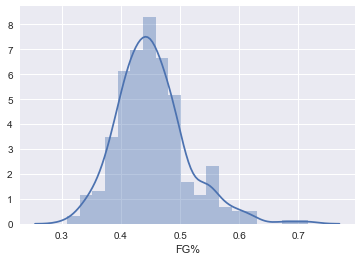

In [22]:
sns.distplot(shooter_df['FG%'])
plt.show()

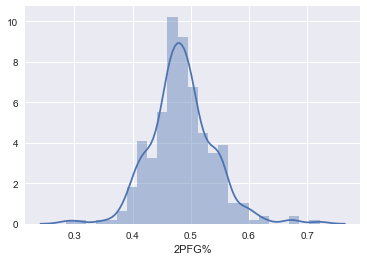

In [23]:
sns.distplot(shooter_df['2PFG%'])
plt.show()

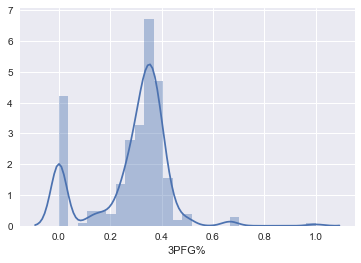

In [24]:
sns.distplot(shooter_df['3PFG%'])
plt.show()

0.5076629620856347


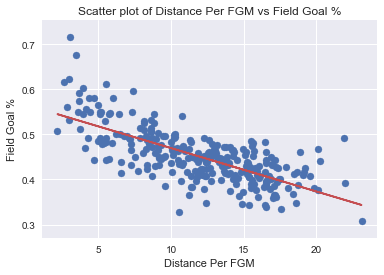

In [25]:
x = shooter_df['DPFGM']
y = shooter_df['FG%']

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value ** 2)

def best_fit(indep):
    return slope * indep + intercept

fit_line = best_fit(x)

plt.title('Scatter plot of Distance Per FGM vs Field Goal %')
plt.xlabel('Distance Per FGM')
plt.ylabel('Field Goal %')
plt.scatter(x,y)
plt.plot(x,fit_line,color='r')
plt.show()

0.5575280093443672


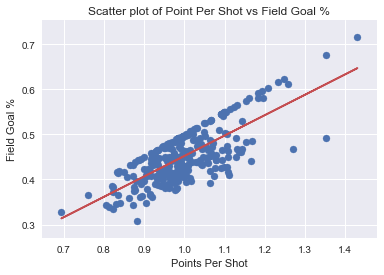

In [26]:
x = shooter_df['PPS']
y = shooter_df['FG%']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value ** 2)

def best_fit(indep):
    return slope * indep + intercept

fit_line = best_fit(x)

plt.title('Scatter plot of Point Per Shot vs Field Goal %')
plt.xlabel('Points Per Shot')
plt.ylabel('Field Goal %')
plt.scatter(x,y)
plt.plot(x,fit_line,color='r')
plt.show()

In [27]:
shooter_df[shooter_df['PPS'] > 1.2].sort_values(by='FG%', axis=0, ascending=False)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
109092,201599,deandre jordan,279.000,390.000,0.715,279.000,387.000,0.721,0.000,3.000,0.000,0.992,558.000,1.431,842.500,3.020,1337.600,3.430,62.000,4.500,6.290,9.000
36622,2199,tyson chandler,230.000,340.000,0.676,230.000,340.000,0.676,0.000,0.000,0.000,1.000,460.000,1.353,795.000,3.457,1404.400,4.131,55.000,4.182,6.182,8.364
8408,203497,rudy gobert,166.000,266.000,0.624,166.000,265.000,0.626,0.000,1.000,0.000,0.996,332.000,1.248,495.500,2.985,946.100,3.557,58.000,2.862,4.586,5.724
37817,202962,greg smith,29.000,47.000,0.617,29.000,47.000,0.617,0.000,0.000,0.000,1.000,58.000,1.234,76.400,2.634,125.500,2.670,27.000,1.074,1.741,2.148
34368,201949,james johnson,190.000,310.000,0.613,180.000,269.000,0.669,10.000,41.000,0.244,0.868,390.000,1.258,1055.600,5.556,2438.300,7.865,49.000,3.878,6.327,7.959
10523,202334,ed davis,210.000,348.000,0.603,210.000,348.000,0.603,0.000,0.000,0.000,1.000,420.000,1.207,821.600,3.912,1534.100,4.408,59.000,3.559,5.898,7.119
20013,2594,kyle korver,235.000,478.000,0.492,59.000,123.000,0.480,176.000,355.000,0.496,0.257,646.000,1.351,5150.800,21.918,10520.800,22.010,59.000,3.983,8.102,10.949
29594,202337,luke babbitt,73.000,156.000,0.468,21.000,53.000,0.396,52.000,103.000,0.505,0.340,198.000,1.269,1467.600,20.104,3072.500,19.696,41.000,1.780,3.805,4.829


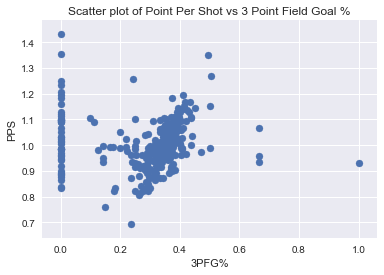

In [28]:
x = shooter_df['3PFG%']
y = shooter_df['PPS']

plt.title('Scatter plot of Point Per Shot vs 3 Point Field Goal %')
plt.xlabel('3PFG%')
plt.ylabel('PPS')
plt.scatter(x,y)
plt.show()

In [29]:
shooter_df[shooter_df['3PFG%'] > 0.6].sort_values(by='FG%', axis=0, ascending=False)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
43296,202696,nikola vucevic,478.000,899.000,0.532,476.000,896.000,0.531,2.000,3.000,0.667,0.997,958.000,1.066,4108.300,8.595,8485.100,9.438,56.000,8.536,16.054,17.107
486,2744,al jefferson,380.000,795.000,0.478,378.000,792.000,0.477,2.000,3.000,0.667,0.996,762.000,0.958,3228.000,8.495,7426.000,9.341,50.000,7.600,15.900,15.240
100332,202326,demarcus cousins,365.000,784.000,0.466,363.000,781.000,0.465,2.000,3.000,0.667,0.996,732.000,0.934,2644.200,7.244,6880.400,8.776,45.000,8.111,17.422,16.267
1286,203469,cody zeller,165.000,355.000,0.465,164.000,354.000,0.463,1.000,1.000,1.000,0.997,331.000,0.932,1498.900,9.084,3774.600,10.633,58.000,2.845,6.121,5.707


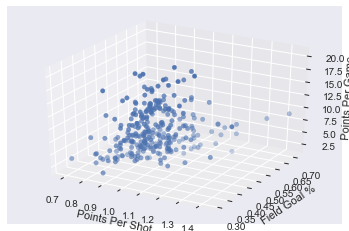

In [30]:
x = shooter_df['PPS'] 
y = shooter_df['FG%'] 
z = shooter_df['PPG']

threedee = plt.figure().gca(projection='3d') 
threedee.scatter(x, y, z) 
threedee.set_xlabel('Points Per Shot')
threedee.set_ylabel('Field Goal %')
threedee.set_zlabel('Points Per Game')
plt.show()

In [31]:
shooter_df[(shooter_df['PPS'] > 1) & (shooter_df['PPG'] > 15) & (shooter_df['FG%'] > 0.45)].sort_values(by='FG%', axis=0, ascending=False)

,PLAYER_ID,PLAYER,FGM,FGA,FG%,2PFGM,2PFGA,2PFG%,3PFGM,3PFGA,3PFG%,2P%,POINTS,PPS,FGM_DIST,DPFGM,FGA_DIST,DPFGA,TOTAL_GAME,FGM_PER_GAME,FGA_PER_GAME,PPG
29750,203076,anthony davis,456.000,837.000,0.545,455.000,828.000,0.550,1.000,9.000,0.111,0.989,913.000,1.091,4013.500,8.802,8725.600,10.425,49.000,9.306,17.082,18.633
43296,202696,nikola vucevic,478.000,899.000,0.532,476.000,896.000,0.531,2.000,3.000,0.667,0.997,958.000,1.066,4108.300,8.595,8485.100,9.438,56.000,8.536,16.054,17.107
110077,201933,blake griffin,444.000,889.000,0.499,436.000,868.000,0.502,8.000,21.000,0.381,0.976,896.000,1.008,4546.000,10.239,10525.700,11.840,51.000,8.706,17.431,17.569
45834,2544,lebron james,477.000,977.000,0.488,392.000,725.000,0.541,85.000,252.000,0.337,0.742,1039.000,1.063,5384.400,11.288,13688.800,14.011,51.000,9.353,19.157,20.373
14054,201939,stephen curry,470.000,968.000,0.486,280.000,512.000,0.547,190.000,456.000,0.417,0.529,1130.000,1.167,7277.300,15.484,16911.400,17.470,58.000,8.103,16.690,19.483
108207,101108,chris paul,425.000,885.000,0.480,328.000,629.000,0.521,97.000,256.000,0.379,0.711,947.000,1.070,6648.600,15.644,14705.600,16.616,62.000,6.855,14.274,15.274
44663,202681,kyrie irving,437.000,939.000,0.465,318.000,644.000,0.494,119.000,295.000,0.403,0.686,993.000,1.058,5687.900,13.016,13349.100,14.216,57.000,7.667,16.474,17.421
15022,202691,klay thompson,449.000,970.000,0.463,272.000,564.000,0.482,177.000,406.000,0.436,0.581,1075.000,1.108,7061.300,15.727,16279.800,16.783,58.000,7.741,16.724,18.534
95021,2547,chris bosh,343.000,743.000,0.462,280.000,575.000,0.487,63.000,168.000,0.375,0.774,749.000,1.008,4927.300,14.365,11368.100,15.300,44.000,7.795,16.886,17.023
92194,201935,james harden,474.000,1053.000,0.450,319.000,648.000,0.492,155.000,405.000,0.383,0.615,1103.000,1.047,6226.800,13.137,15647.700,14.860,59.000,8.034,17.847,18.695


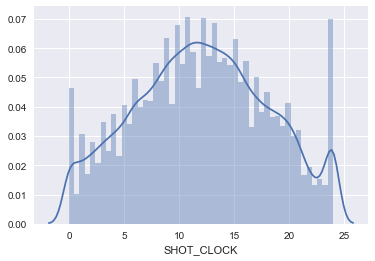

In [32]:
shot_df['SHOT_CLOCK'] = shot_df['SHOT_CLOCK'].fillna(0)
sns.distplot(shot_df['SHOT_CLOCK'])
plt.show()

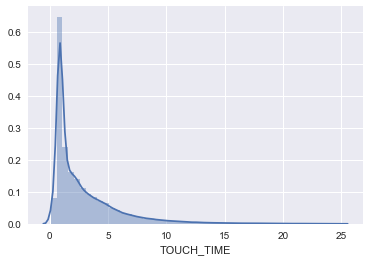

In [33]:
touchtime_df = shot_df[shot_df["TOUCH_TIME"] > 0]
touchtime_df["TOUCH_TIME"].describe()

sns.distplot(touchtime_df['TOUCH_TIME'])
plt.show()

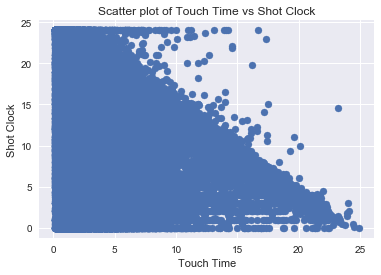

In [34]:
x = touchtime_df['TOUCH_TIME']
y = touchtime_df['SHOT_CLOCK']

plt.title('Scatter plot of Touch Time vs Shot Clock')
plt.xlabel('Touch Time')
plt.ylabel('Shot Clock')
plt.scatter(x,y)
plt.show()

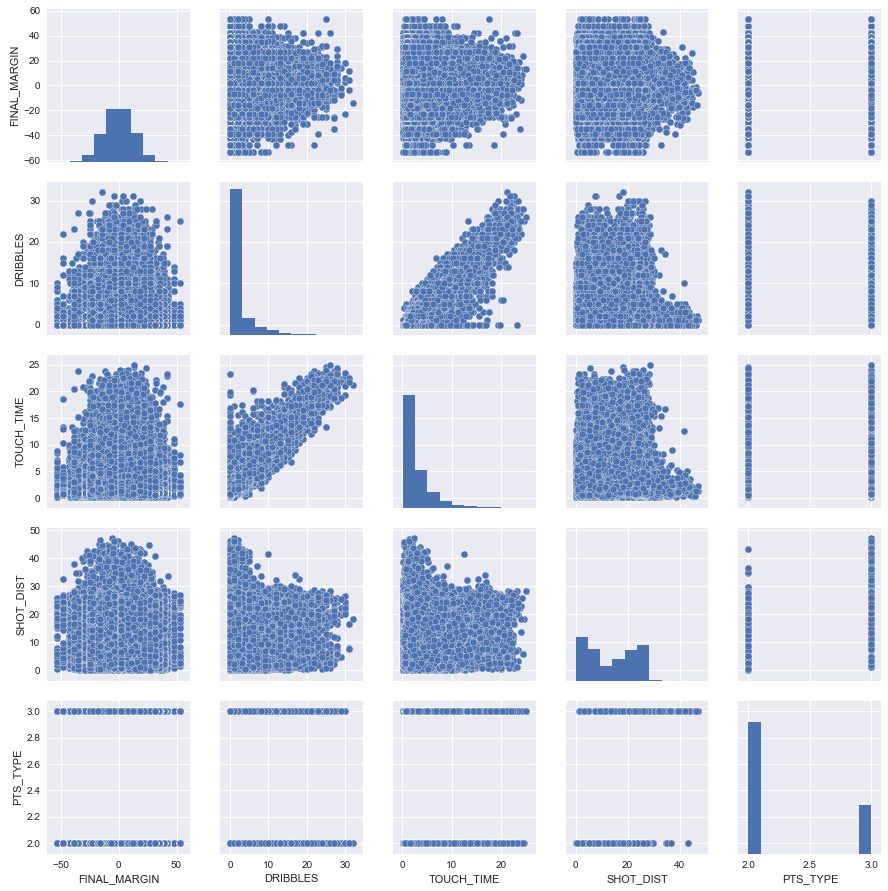

In [35]:
raw_df = touchtime_df[['FINAL_MARGIN','DRIBBLES','TOUCH_TIME','SHOT_DIST','PTS_TYPE']]
sns.pairplot(raw_df)
plt.show()

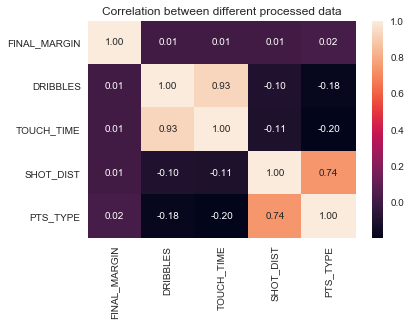

In [36]:
sns.heatmap(raw_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation between different processed data')
plt.show()

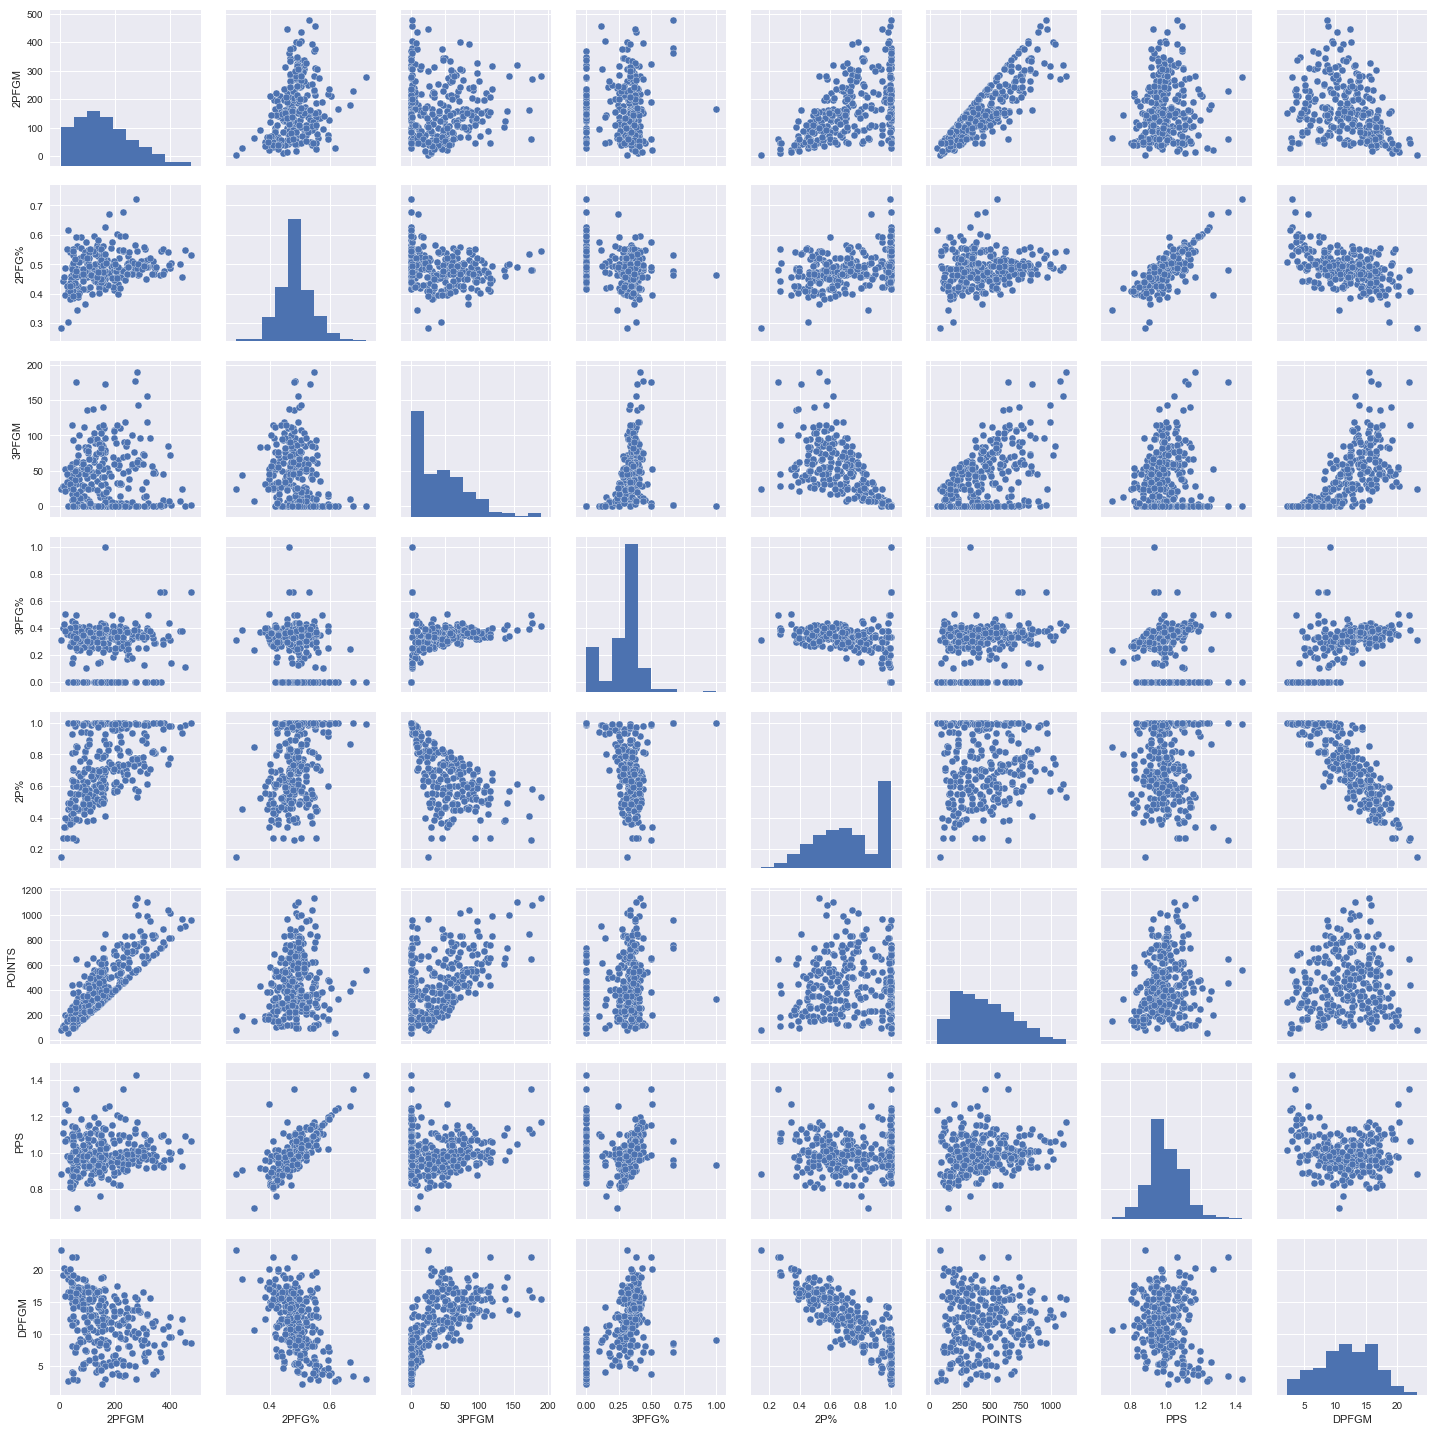

In [37]:
processed_df = shooter_df[['2PFGM','2PFG%','3PFGM','3PFG%','2P%','POINTS','PPS','DPFGM']]
sns.pairplot(processed_df)
plt.show()

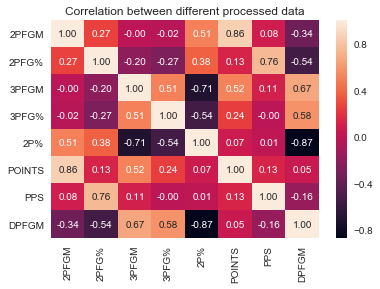

In [38]:
sns.heatmap(processed_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation between different processed data')
plt.show()

In [39]:
# DFG%
for index, row in defender_df.iterrows():
    this_id = row['PLAYER_ID']
    
    defender_df.loc[(defender_df['PLAYER_ID'] == this_id), 'DFGM']\
        = shot_df[(shot_df['SHOT_RESULT'] == 'made')\
          & (shot_df['CLOSEST_DEFENDER_PLAYER_ID'] == this_id)]['player_id'].count()
    
    defender_df.loc[(defender_df['PLAYER_ID'] == this_id), 'DFGA']\
        = shot_df[(shot_df['CLOSEST_DEFENDER_PLAYER_ID'] == this_id)]['player_id'].count()
    
    defender_df['DFG%'] = defender_df['DFGM'] / defender_df['DFGA']
    
    # OFG% - average FG% of shooters this defender guards
    defender_dict = {}
    for shooter_index, shooter_row in shooter_df.iterrows():
        shooter_id = shooter_row['PLAYER_ID']
        shots_against_player = shot_df[(shot_df['CLOSEST_DEFENDER_PLAYER_ID'] == this_id)\
                                        & (shot_df['player_id'] == shooter_id)]['player_id'].count()
        if shots_against_player > 0:
            defender_dict[shooter_id] = shots_against_player
    
    ofg = 0.0
    
    for shooter, shots in defender_dict.items():
        ofg += shots * shooter_df[ (shooter_df['PLAYER_ID'] == shooter)].iloc[0]['FG%']
    
    total_shots = defender_df[(defender_df['PLAYER_ID'] == this_id)]['DFGA']
    
    defender_df.loc[(defender_df['PLAYER_ID'] == this_id), 'oFG%'] = ofg / total_shots

In [90]:
defender_df['diff'] = defender_df['DFG%'] - defender_df['oFG%']
defender_df['diff%'] = defender_df['diff'] / defender_df['oFG%'] * 100

In [91]:
defender_df[defender_df['DFGA'] > 300].nsmallest(10,'diff%')

,PLAYER_ID,PLAYER,DFGM,DFGA,DFG%,oFG%,diff,diff%
978,101106,"Bogut, Andrew",168.000,433.000,0.388,0.480,-0.092,-19.124
908,2754,"Allen, Tony",113.000,317.000,0.356,0.436,-0.080,-18.330
440,203497,"Gobert, Rudy",192.000,489.000,0.393,0.474,-0.081,-17.151
1331,203460,"Roberson, Andre",120.000,319.000,0.376,0.444,-0.068,-15.313
135,201579,"Hibbert, Roy",212.000,517.000,0.410,0.479,-0.069,-14.371
272,203110,"Green, Draymond",300.000,749.000,0.401,0.458,-0.058,-12.609
433,201586,"Ibaka, Serge",334.000,814.000,0.410,0.467,-0.057,-12.183
1221,203076,"Davis, Anthony",247.000,609.000,0.406,0.460,-0.055,-11.915
186,203114,"Middleton, Khris",165.000,421.000,0.392,0.440,-0.048,-10.832
1895,202344,"Booker, Trevor",124.000,305.000,0.407,0.454,-0.048,-10.479


In [97]:
defender_df[defender_df['DFGA'] > 300].nlargest(10,'diff%')

,PLAYER_ID,PLAYER,DFGM,DFGA,DFG%,oFG%,diff,diff%
215,203504,"Burke, Trey",251.000,507.000,0.495,0.442,0.053,12.011
151,203501,"Hardaway Jr., Tim",187.000,378.000,0.495,0.444,0.051,11.434
1641,2749,"Nelson, Jameer",145.000,303.000,0.479,0.432,0.046,10.661
1453,2772,"Ariza, Trevor",236.000,477.000,0.495,0.448,0.046,10.372
580,1717,"Nowitzki, Dirk",296.000,577.000,0.513,0.465,0.048,10.227
123,2590,"Williams, Mo",185.000,384.000,0.482,0.438,0.044,9.968
355,201583,"Anderson, Ryan",226.000,451.000,0.501,0.456,0.045,9.792
162,203082,"Ross, Terrence",225.000,462.000,0.487,0.444,0.043,9.774
267,201578,"Speights, Marreese",189.000,365.000,0.518,0.472,0.045,9.589
192,203901,"Payton, Elfrid",217.000,457.000,0.475,0.434,0.041,9.356


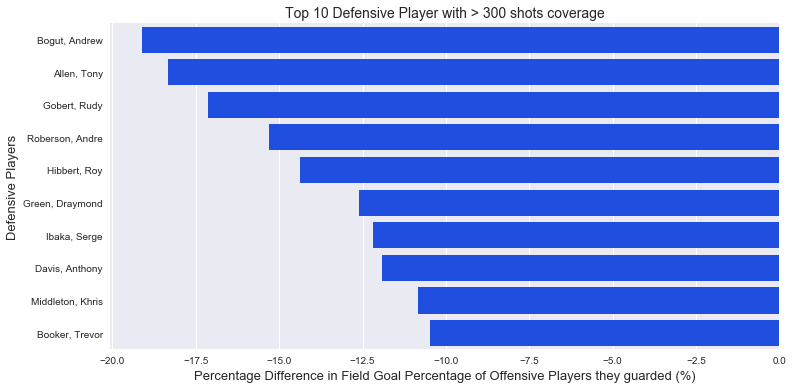

In [98]:
plt.figure(figsize=(12,6))
sns.set_color_codes('bright')
sns.barplot(x='diff%', y='PLAYER', data=defender_df[defender_df['DFGA'] > 300].nsmallest(10,'diff%'),
            label='Total', color='b')
plt.title('Top 10 Defensive Player with > 300 shots coverage', fontsize=14)
plt.ylabel('Defensive Players', fontsize=13)
plt.xlabel('Percentage Difference in Field Goal Percentage of Offensive Players they guarded (%)', fontsize=13)
plt.show()

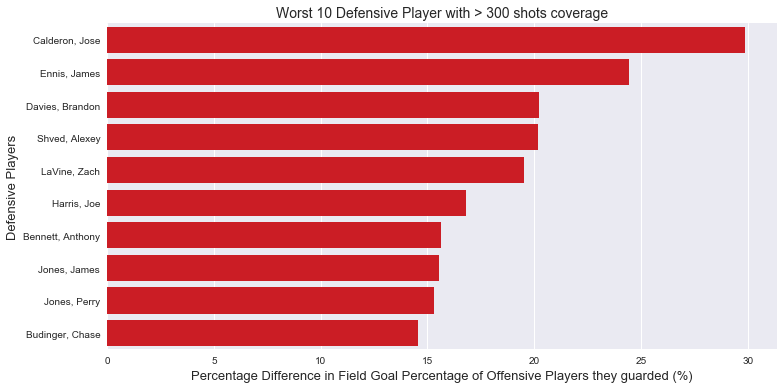

In [100]:
plt.figure(figsize=(12,6))
sns.set_color_codes('bright')
sns.barplot(x='diff%', y='PLAYER', data=defender_df[defender_df['DFGA'] > 100].nlargest(10,'diff%'),
            label='Total', color='r')
plt.title('Worst 10 Defensive Player with > 300 shots coverage', fontsize=14)
plt.ylabel('Defensive Players', fontsize=13)
plt.xlabel('Percentage Difference in Field Goal Percentage of Offensive Players they guarded (%)', fontsize=13)
plt.show()